In [31]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

# Read Data

In [32]:
start=pd.to_datetime('2002-01-01')
end=pd.datetime.today()

In [33]:
mkt='SPY'
MKT=(web.DataReader([mkt],'yahoo',start,end)['Adj Close']
    .rename(columns={mkt:mkt})
    .assign(sret=lambda x:np.log(x[mkt])/x[mkt].shift(1))
     #.assign(eret=lambda x:np.log(x['DX']/x['DX'].shift(1)))
    .dropna())

In [38]:
MKT=web.DataReader([mkt],'yahoo',start,end)

In [42]:
MKT.dtypes

Attributes  Symbols
High        SPY        float64
Low         SPY        float64
Open        SPY        float64
Close       SPY        float64
Volume      SPY        float64
Adj Close   SPY        float64
dtype: object

In [45]:
MKT['sret']=np.log(MKT['Adj Close'])-np.log(MKT['Adj Close']).shift(1)

In [47]:
MKT=MKT.dropna()

In [48]:
MKT

Attributes,High,Low,Open,Close,Volume,Adj Close,sret
Symbols,SPY,SPY,SPY,SPY,SPY,SPY,
Date,,,,,,,
2002-01-02,115.750000,113.809998,115.110001,115.529999,18651900.0,82.457008,0.010704
2002-01-03,116.949997,115.540001,115.650002,116.839996,15743000.0,83.391983,0.011275
2002-01-04,117.980003,116.550003,117.169998,117.620003,20140700.0,83.948692,0.006654
2002-01-07,117.989998,116.559998,117.699997,116.790001,13106500.0,83.356293,-0.007082
2002-01-08,117.059998,115.970001,116.790001,116.519997,12683700.0,83.163574,-0.002315
2002-01-09,117.779999,115.339996,116.680000,115.570000,16610300.0,82.485535,-0.008187
2002-01-10,116.349998,115.300003,115.690002,116.080002,12823400.0,82.849533,0.004403
2002-01-11,116.279999,114.699997,116.209999,114.940002,13708400.0,82.035881,-0.009869


In [43]:
MKT['Adj Close']

Symbols,SPY
Date,
2001-12-31,81.579086
2002-01-02,82.457008
2002-01-03,83.391983
2002-01-04,83.948692
2002-01-07,83.356293
2002-01-08,83.163574
2002-01-09,82.485535
2002-01-10,82.849533
2002-01-11,82.035881


In [44]:
# AMZN=(web.DataReader(['AMZN'],'yahoo',start,end)['Adj Close']
#     .rename(columns={'AMZN':'AMZN'})
#     .assign(aret=lambda x:np.log(x['AMZN']/x['AMZN'].shift(1)))
#      #.assign(eret=lambda x:np.log(x['DX']/x['DX'].shift(1)))
#     .dropna())
# MKT.head()

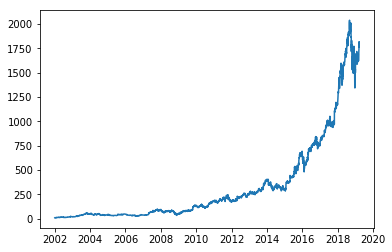

In [5]:
plt.plot(AMZN['AMZN'])

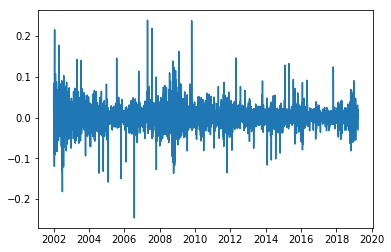

In [6]:
plt.plot(AMZN['aret'])

(array([1.000e+00, 3.000e+00, 1.700e+01, 6.900e+01, 1.626e+03, 2.463e+03,
        1.310e+02, 1.600e+01, 5.000e+00, 4.000e+00]),
 array([-0.24618153, -0.19770128, -0.14922104, -0.10074079, -0.05226054,
        -0.00378029,  0.04469996,  0.0931802 ,  0.14166045,  0.1901407 ,
         0.23862095]),
 <a list of 10 Patch objects>)

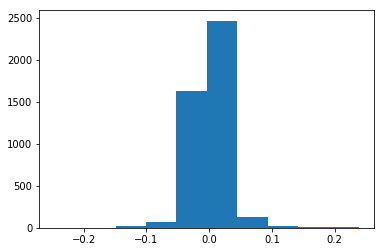

In [7]:
plt.hist(AMZN['aret'])

In [8]:
# Import data
data=AMZN
# Drop date variable
# data = data.drop(['DATE'], 1)
# Dimensions of dataset
n = data.shape[0]  #n=4724
p = data.shape[1]  #p=2
# Make data a numpy array
data = data.values

In [9]:
print(AMZN.info())
# print(data['AMAZON_data'].head(10))
# f=open('data_stocks.csv','r')
# print(f.readline())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4335 entries, 2002-01-02 to 2019-03-22
Data columns (total 2 columns):
AMZN    4335 non-null float64
aret    4335 non-null float64
dtypes: float64(2)
memory usage: 101.6 KB
None


In [10]:
print(type(AMZN))

<class 'pandas.core.frame.DataFrame'>


In [11]:
from ta import *
AMZN['bollinger'] = bollinger_hband_indicator(AMZN["AMZN"], n=20, ndev=2,
                                                        fillna=True)

print(AMZN.info())
print(AMZN.head())
print(AMZN.tail())
print(AMZN['bollinger'])

count = 0
l = []
for i in AMZN['bollinger']:
    if (float(i) > 0):
        count += 1
        print(i)
print(count)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4335 entries, 2002-01-02 to 2019-03-22
Data columns (total 3 columns):
AMZN         4335 non-null float64
aret         4335 non-null float64
bollinger    4335 non-null float64
dtypes: float64(3)
memory usage: 295.5 KB
None
Symbols      AMZN      aret  bollinger
Date                                  
2002-01-02  10.96  0.012856        0.0
2002-01-03  11.90  0.082286        0.0
2002-01-04  12.25  0.028988        0.0
2002-01-07  12.34  0.007320        0.0
2002-01-08  11.85 -0.040518        0.0
Symbols            AMZN      aret  bollinger
Date                                        
2019-03-18  1742.150024  0.017247        1.0
2019-03-19  1761.849976  0.011244        1.0
2019-03-20  1797.270020  0.019904        1.0
2019-03-21  1819.260010  0.012161        1.0
2019-03-22  1764.770020 -0.030409        0.0
Date
2002-01-02    0.0
2002-01-03    0.0
2002-01-04    0.0
2002-01-07    0.0
2002-01-08    0.0
2002-01-09    0.0
2002-01-10    0.0
2002-

In [50]:
# Import data
data=MKT
# Drop date variable
# data = data.drop(['DATE'], 1)
# Dimensions of dataset
n = data.shape[0]  #n=4724
p = data.shape[1]  #p=2
# Make data a numpy array
data = data.values

In [51]:
# Training and test data
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]

In [52]:
# Scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)
# Build X and y
X_train = data_train[:, 0:4]
y_train = data_train[:, 5]
X_test = data_test[:, 0:4]
y_test = data_test[:, 5]

In [53]:
print(data_test)

[[0.91640003 0.91770112 0.91864542 ... 0.05601559 0.9343165  0.43718399]
 [0.91918212 0.91180303 0.91334565 ... 0.09268324 0.92597413 0.40681059]
 [0.91021002 0.90419038 0.91011073 ... 0.10550813 0.91966819 0.41315066]
 ...
 [1.48490751 1.46231398 1.47436158 ... 0.08870917 1.59339006 0.42063825]
 [1.49659198 1.46416563 1.46389982 ... 0.0828471  1.61578489 0.48019084]
 [1.48699395 1.45449548 1.48165732 ... 0.13256884 1.57719275 0.35199919]]


In [65]:
# Placeholder
X = tf.placeholder(dtype=tf.float32, shape=[None, 4])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

In [66]:
# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [71]:
# Model architecture parameters
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128
n_target = 1
# Layer 1: Variables for hidden weights and biases
W_hidden_1 = tf.Variable(weight_initializer([4, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
# Layer 2: Variables for hidden weights and biases
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
# Layer 3: Variables for hidden weights and biases
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
# Layer 4: Variables for hidden weights and biases
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

# Output layer: Variables for output weights and biases
W_out = tf.Variable(weight_initializer([n_neurons_4, n_target]))
bias_out = tf.Variable(bias_initializer([n_target]))

In [72]:
bias_hidden_2.shape

TensorShape([Dimension(512)])

In [73]:
# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

# Output layer (must be transposed)
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

In [74]:
print(bias_out)

<tf.Variable 'Variable_39:0' shape=(1,) dtype=float32_ref>


In [75]:
# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))

In [76]:
print(mse)

Tensor("Mean_2:0", shape=(), dtype=float32)


In [77]:
# Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

0.0002773905


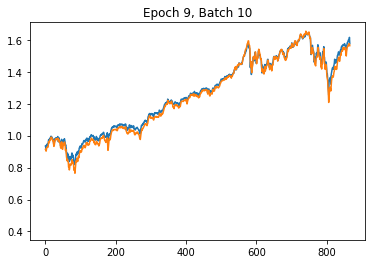

In [78]:
# Make Session
net = tf.Session()
# Run initializer
net.run(tf.global_variables_initializer())

# Setup interactive plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test*0.5)
# plt.show()

# Number of epochs and batch size
epochs = 10
batch_size = 256

for e in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})

        # Show progress
        if np.mod(i, 5) == 0:
            # Prediction
            pred = net.run(out, feed_dict={X: X_test})
            line2.set_ydata(pred)
            plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            file_name = 'img/epoch_' + str(e) + '_batch_' + str(i) + '.png'
            plt.savefig(file_name)
#             plt.pause(0.01)
# Print final MSE after Training
mse_final = net.run(mse, feed_dict={X: X_test, Y: y_test})
print(mse_final)